In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded= files.upload()

Saving iris1.csv to iris1.csv


In [ ]:
ds=pd.read_csv('iris1.csv')

In [ ]:
ds.head(10)

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
5,NaN,3.9,1.7,0.4,Setosa
6,4.6,3.4,1.4,0.3,Setosa
7,5.0,3.4,1.5,0.2,Setosa
8,4.4,2.9,1.4,0.2,Setosa
9,4.9,3.1,1.5,0.1,Setosa


In [ ]:
from sklearn.preprocessing import StandardScaler as ss
x=ds.iloc[:,:-1]
x.head()

,sepal.length,sepal.width,petal.length,petal.width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [ ]:
y=ds.iloc[:,-1]
y.head()

0    Setosa
1    Setosa
2    Setosa
3    Setosa
4    Setosa
Name: variety, dtype: object

In [ ]:
x= ss().fit_transform(x)
print(type(x))

<class 'numpy.ndarray'>


In [ ]:
x=pd.DataFrame(x)
print(type(x))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
x.head()

,0,1,2,3
0,-0.927821,1.030413,-1.363054,-1.315444
1,-1.171374,-0.121408,-1.363054,-1.315444
2,-1.414927,0.339320,-1.420137,-1.315444
3,-1.536703,0.108956,-1.305971,-1.315444
4,-1.049597,1.260777,-1.363054,-1.315444


In [ ]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       147 non-null    float64
 1   1       148 non-null    float64
 2   2       148 non-null    float64
 3   3       150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [ ]:
x.dropna(axis=0,inplace=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 0 to 149
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       143 non-null    float64
 1   1       143 non-null    float64
 2   2       143 non-null    float64
 3   3       143 non-null    float64
dtypes: float64(4)
memory usage: 5.6 KB


In [ ]:
from sklearn.decomposition import PCA
pca= PCA()
xpca=pca.fit_transform(x)
xpca=pd.DataFrame(xpca)
xpca.head()

,0,1,2,3
0,-2.363800,0.568634,-0.146133,-0.027069
1,-2.213204,-0.592699,-0.239768,-0.103677
2,-2.488998,-0.249762,0.034681,-0.027147
3,-2.431596,-0.506652,0.084233,0.068706
4,-2.485106,0.740426,-0.004958,0.034080


In [ ]:
explained_variance= pca.explained_variance_ratio_
explained_variance

array([0.72331904, 0.23257204, 0.0387782 , 0.00533072])

In [ ]:
xpca['target']=y
xpca.columns=['pc1','pc2','pc3','pc4','target']
xpca.head()

,pc1,pc2,pc3,pc4,target
0,-2.363800,0.568634,-0.146133,-0.027069,Setosa
1,-2.213204,-0.592699,-0.239768,-0.103677,Setosa
2,-2.488998,-0.249762,0.034681,-0.027147,Setosa
3,-2.431596,-0.506652,0.084233,0.068706,Setosa
4,-2.485106,0.740426,-0.004958,0.034080,Setosa


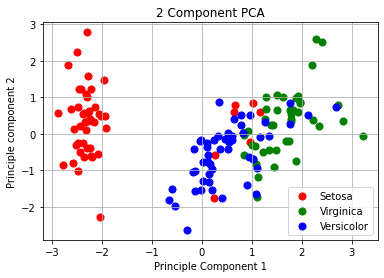

In [ ]:
fig=plt.figure()
ax= fig.add_subplot(1,1,1)
ax.set_xlabel('Principle Component 1')
ax.set_ylabel('Principle component 2')
ax.set_title('2 Component PCA')
targets= ['Setosa','Virginica','Versicolor']
colors=['r','g','b']
for target, color in zip(targets,colors):
    indicesToKeep = xpca['target']==target
    ax.scatter(xpca.loc[indicesToKeep,'pc1'],
               xpca.loc[indicesToKeep,'pc2'],
               c=color,
               s=50)
ax.legend(targets)
ax.grid()